In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d soumendraprasad/201k-tweets-on-mrmodimrrahulmrkejrielecanal

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/201k-tweets-on-mrmodimrrahulmrkejrielecanal
License(s): CC0-1.0
 88% 14.0M/15.9M [00:02<00:00, 9.57MB/s]
100% 15.9M/15.9M [00:02<00:00, 7.84MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/201k-tweets-on-mrmodimrrahulmrkejrielecanal.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("extracted")

extracted


In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as ex
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
modi_data = pd.read_csv('/content/Narendra Modi_data.csv')
rahul_data = pd.read_csv('/content/Rahul Gandhi_data.csv')
kj_data = pd.read_csv('/content/Arvind Kejriwal_data.csv')

In [ ]:
modi_data.shape


(70000, 4)

In [ ]:
rahul_data.shape


(70000, 4)

In [ ]:
kj_data.shape


(70000, 4)

In [ ]:
modi_data.head()

,Date,User,Tweet,Time
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38
2,2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi along with H...,23:51:02
3,2022:10:19,BravePedestrian,Bharat Mata has waited 5000 years for a true s...,23:40:58
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25


In [ ]:
modi_data.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [ ]:
rahul_data.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [ ]:
kj_data.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [ ]:
# download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# url remove
def removeURL(col_data):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',col_data)

In [ ]:
# remove html tags
def remove_html(headline_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',headline_text)


In [ ]:
# covert emojis to machine language
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030" "]+", re.UNICODE)
    return re.sub(emoj, '', data)


In [ ]:
# remove puncuations
def remove_punct(headline_text):
    import string #import string
    table=str.maketrans('','',string.punctuation)
    return headline_text.translate(table)


In [ ]:
# lemmetization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
# function for basic data preprocessing
def preprocess_text_data(data, text_column_name):
    # Lowercasing
    data[text_column_name] = data[text_column_name].str.lower()

    # Check and handle missing values
    print(f"Data type of '{text_column_name}' column before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' column before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])

    # Convert the column to strings
    data.loc[:, text_column_name] = data[text_column_name].astype(str)


    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

    # # Stemming
    # stemmer = PorterStemmer()
    # data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

    #Lemmatization
    # lemmatization is better than stemming
    lemmatizer = WordNetLemmatizer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

    # Remove numbers
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))

    return data

# Apply text preprocessing to Modi data
# modi_data = preprocess_text_data(modi_data, 'Tweet')
# modi_data = modi_data.drop('Unnamed: 0', axis=1)

In [ ]:
# for modi data
#remove urls
modi_data['Tweet'] = modi_data['Tweet'].apply(removeURL)
# remove html tags
modi_data['Tweet'] = modi_data['Tweet'].apply(remove_html)
# remove emojis
modi_data['Tweet'] = modi_data['Tweet'].apply(remove_emojis)
#remove puncuations
modi_data['Tweet'] = modi_data['Tweet'].apply(remove_punct)
# basic preprocessing function
modi_data = preprocess_text_data(modi_data, 'Tweet')

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 0


In [ ]:
# for rahul data
#remove urls
rahul_data['Tweet'] = rahul_data['Tweet'].apply(removeURL)
# remove html tags
rahul_data['Tweet'] = rahul_data['Tweet'].apply(remove_html)
# remove emojis
rahul_data['Tweet'] = rahul_data['Tweet'].apply(remove_emojis)
#remove puncuations
rahul_data['Tweet'] = rahul_data['Tweet'].apply(remove_punct)
# basic preprocessing function
rahul_data = preprocess_text_data(rahul_data, 'Tweet')

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 0


In [ ]:
# for kj data
#remove urls
kj_data['Tweet'] = kj_data['Tweet'].apply(removeURL)
# remove html tags
kj_data['Tweet'] =kj_data['Tweet'].apply(remove_html)
# remove emojis
kj_data['Tweet'] = kj_data['Tweet'].apply(remove_emojis)
#remove puncuations
kj_data['Tweet'] = kj_data['Tweet'].apply(remove_punct)
# basic preprocessing function
kj_data = preprocess_text_data(kj_data, 'Tweet')

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 0


In [ ]:
modi_data.head()

,Date,User,Tweet,Time
0,2022:10:19,QuestionsBotYT,narendra modi toaster,23:57:08
1,2022:10:19,PaperDabba,g bring major change revolutionise education s...,23:56:38
2,2022:10:19,mnjworldcom123,prime minister shri narendra modi along mr pra...,23:51:02
3,2022:10:19,BravePedestrian,bharat mata waited year true son like narendr...,23:40:58
4,2022:10:19,NaMoPraveenKor,narendra modi ’ gamechanging gati shakti maste...,23:34:25


In [ ]:
# a function to find polarity of review using textBlob
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [ ]:
# apply polarity function to modi,rahul,kj data
modi_data['Polarity'] = modi_data['Tweet'].apply(find_polarity)

# apply polarity function to rahul data
rahul_data["Polarity"] = rahul_data['Tweet'].apply(find_polarity)
# apply polarity function to kj data
kj_data["Polarity"] = kj_data['Tweet'].apply(find_polarity)

dataframe with new feature polarity

In [ ]:
modi_data.head()

,Date,User,Tweet,Time,Polarity
0,2022:10:19,QuestionsBotYT,narendra modi toaster,23:57:08,0.0000
1,2022:10:19,PaperDabba,g bring major change revolutionise education s...,23:56:38,0.0625
2,2022:10:19,mnjworldcom123,prime minister shri narendra modi along mr pra...,23:51:02,0.0250
3,2022:10:19,BravePedestrian,bharat mata waited year true son like narendr...,23:40:58,0.3500
4,2022:10:19,NaMoPraveenKor,narendra modi ’ gamechanging gati shakti maste...,23:34:25,0.0000


In [ ]:
rahul_data.head()

,Date,User,Tweet,Time,Polarity
0,2022:10:19,MdIjran,jaikyyadav इन विकल्पों में से और अभी के समय पर...,23:55:49,0.000
1,2022:10:19,28bde43dae3c430,ndtv rahul gandhi left congress mid road entru...,23:53:30,-0.025
2,2022:10:19,SkAnzar5,jaikyyadav rahul gandhi,23:32:16,0.000
3,2022:10:19,HariRamDamor2,rahul gandhi ji real hero india,23:32:09,0.200
4,2022:10:19,srinivas_das,rahul gandhi getting massive support andhra pr...,23:21:18,0.000


In [ ]:
kj_data.head()

,Date,User,Tweet,Time,Polarity
0,2022:10:19,bhoo_sene,tajinderbagga aap leader speaking hindu god le...,23:47:01,0.30
1,2022:10:19,Madhusu88858324,bjp aap se sikh rhi h narendra modi manish sis...,23:06:35,0.00
2,2022:10:19,PremshilaKumarp,jaikyyadav arvind kejriwal,22:56:42,0.00
3,2022:10:19,lifebecom,arvind kejriwal pm visit gujarat school,22:20:51,0.00
4,2022:10:19,sphavisha,arvind kejriwals stand rape clear statement si...,22:20:16,-0.25


In [ ]:
# if poalrity >0 positive ,<0 negative, else neutral
# apply modi data
modi_data['sentiment'] = np.where(modi_data['Polarity'] > 0, 'positive', 'negative')
modi_data['sentiment'][modi_data['Polarity'] == 0] = 'neutral'

# apply rahul data
rahul_data['sentiment'] = np.where(rahul_data['Polarity'] > 0, 'positive', 'negative')
rahul_data['sentiment'][rahul_data['Polarity'] == 0] = 'neutral'

# apply kj data
kj_data['sentiment'] = np.where(kj_data['Polarity'] > 0, 'positive', 'negative')
kj_data['sentiment'][kj_data['Polarity'] == 0] = 'neutral'

<ipython-input-23-247bb3e9910a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_data['sentiment'][modi_data['Polarity'] == 0] = 'neutral'
<ipython-input-23-247bb3e9910a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_data['sentiment'][rahul_data['Polarity'] == 0] = 'neutral'
<ipython-input-23-247bb3e9910a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kj_data['sentiment'][kj_data['Polarity'] == 0] = 'neutral'


In [ ]:
modi_data.head()

,Date,User,Tweet,Time,Polarity,sentiment
0,2022:10:19,QuestionsBotYT,narendra modi toaster,23:57:08,0.0000,neutral
1,2022:10:19,PaperDabba,g bring major change revolutionise education s...,23:56:38,0.0625,positive
2,2022:10:19,mnjworldcom123,prime minister shri narendra modi along mr pra...,23:51:02,0.0250,positive
3,2022:10:19,BravePedestrian,bharat mata waited year true son like narendr...,23:40:58,0.3500,positive
4,2022:10:19,NaMoPraveenKor,narendra modi ’ gamechanging gati shakti maste...,23:34:25,0.0000,neutral


In [ ]:
# remove neutral reviews from modi data
neutral_modi_reviews = modi_data[modi_data['Polarity'] == 0.0000]
remove_modi_neutral_reviews = modi_data['Polarity'].isin(neutral_modi_reviews['Polarity'])
modi_data.drop(modi_data[remove_modi_neutral_reviews].index, inplace=True)


# remove neutral reviews from rahul data
neutral_rahul_reviews = rahul_data[rahul_data['Polarity'] == 0.0000]
remove_rahul_neutral_reviews = rahul_data['Polarity'].isin(neutral_rahul_reviews['Polarity'])
rahul_data.drop(rahul_data[remove_rahul_neutral_reviews].index, inplace=True)


# remove neutral reviews from kj data
neutral_kj_reviews = kj_data[kj_data['Polarity'] == 0.0000]
remove_kj_neutral_reviews = kj_data['Polarity'].isin(neutral_kj_reviews['Polarity'])
kj_data.drop(kj_data[remove_kj_neutral_reviews].index, inplace=True)

In [ ]:
modi_data.head()

,Date,User,Tweet,Time,Polarity,sentiment
1,2022:10:19,PaperDabba,g bring major change revolutionise education s...,23:56:38,0.0625,positive
2,2022:10:19,mnjworldcom123,prime minister shri narendra modi along mr pra...,23:51:02,0.0250,positive
3,2022:10:19,BravePedestrian,bharat mata waited year true son like narendr...,23:40:58,0.3500,positive
5,2022:10:19,xuenou,g bring major change revolutionise education s...,23:32:05,0.0625,positive
6,2022:10:19,aammiitt2,narendra modi elon musk politics entreprenuria...,23:25:20,0.3500,positive


In [ ]:
rahul_data.head()

,Date,User,Tweet,Time,Polarity,sentiment
1,2022:10:19,28bde43dae3c430,ndtv rahul gandhi left congress mid road entru...,23:53:30,-0.025000,negative
3,2022:10:19,HariRamDamor2,rahul gandhi ji real hero india,23:32:09,0.200000,positive
5,2022:10:19,sajalgupta172,incindia kharge salao ki kadi mehant ke baad ...,23:07:56,-0.400000,negative
7,2022:10:19,gangwal_pc,grand old party chosen grand old man energize ...,22:54:19,0.300000,positive
8,2022:10:19,nishaDev1,ravish kumar के साथ rahul gandhi live bharat j...,22:48:00,0.136364,positive


In [ ]:
kj_data.head()

,Date,User,Tweet,Time,Polarity,sentiment
0,2022:10:19,bhoo_sene,tajinderbagga aap leader speaking hindu god le...,23:47:01,0.300000,positive
4,2022:10:19,sphavisha,arvind kejriwals stand rape clear statement si...,22:20:16,-0.250000,negative
14,2022:10:19,DivediAbhishek,mukulacme arvindkejriwal achha new education p...,20:36:31,0.068182,positive
15,2022:10:19,Andhravilasnews,kejriwal term ddc backbone delhi development p...,20:34:02,0.136364,positive
16,2022:10:19,ZabedAhmed18,vajinkya elected president said remote control...,20:30:27,-0.100000,negative


In [ ]:
print(neutral_modi_reviews.shape)
print(modi_data.shape)
print('\n')
print(neutral_rahul_reviews.shape)
print(rahul_data.shape)
print('\n')
print(kj_data.shape)

(38138, 6)
(31862, 6)


(42096, 6)
(27904, 6)


(27340, 6)


In [ ]:
import pandas as pd

# Randomly sample 50% of the dataset
sampled_modi_data = modi_data.sample(frac=0.5, random_state=42)


In [ ]:
sampled_modi_data.shape

(15931, 6)

Model Training

In [ ]:
X = sampled_modi_data['Tweet']
y = sampled_modi_data['sentiment']

In [ ]:
X

1        g bring major change revolutionise education s...
2        prime minister shri narendra modi along mr pra...
3        bharat mata waited  year true son like narendr...
5        g bring major change revolutionise education s...
6        narendra modi elon musk politics entreprenuria...
                               ...                        
69992    indian prime minister narendra modi chinese pr...
69993    take part pmmementosauction win iconic gift pr...
69994    spartarg poppympf nitinagarwalinc koi narendra...
69996    specially customised indian aircraft reached n...
69999    special plane land namibia get african cheetah...
Name: Tweet, Length: 31862, dtype: object

In [ ]:
y

1        positive
2        positive
3        positive
5        positive
6        positive
           ...   
69992    positive
69993    positive
69994    positive
69996    positive
69999    positive
Name: sentiment, Length: 31862, dtype: object

In [ ]:
# encode postive negative to 0,1
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [ ]:
y

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
# training data in 20-80 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.head()

38796    prime minister narendra modis birthday celebra...
35942    hpyouthwithmodi chief minister gujarat prime m...
50823    want say happy birthday honorable prime minist...
17121    challenge narendra modi north indianitish rahu...
21602    saroop sharma organic farmer awarded innovativ...
Name: Tweet, dtype: object

In [ ]:
X_test.shape

(3187,)

In [ ]:
# apply bow
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
#   use x_train in cv.fit_tranform() function instead of x_train['Tweet']
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [ ]:
# no of features
X_train_bow.shape

(12744, 21739)

In [ ]:
# ml model gaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [ ]:
 #checking for accuracy of model
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6724192030122372

In [ ]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 272,  203],
       [ 841, 1871]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for the positive class (class 1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9021215043394407
Recall: 0.6898967551622419
F1 Score: 0.7818637693272042


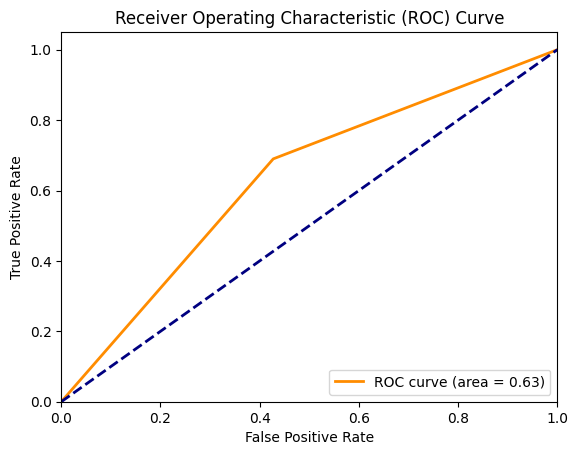

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Getting predicted probabilities for positive class
y_pred_proba = gnb.predict_proba(X_test_bow)[:, 1]

# Calculating false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculating ROC AUC score
roc_auc_score = auc(fpr, tpr)
# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("ROC AUC Score:", roc_auc_score)


ROC AUC Score: 0.6312641670548051


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test,y_pred)

0.9193598995920929

In [ ]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9210977701543739
Recall: 0.9900442477876106
F1 Score: 0.9543273502754576


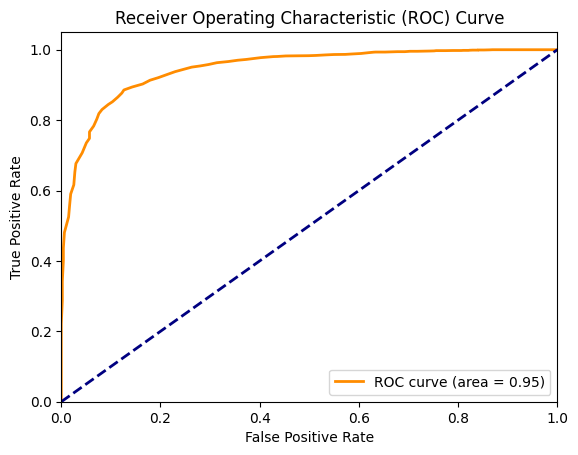

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Getting predicted probabilities for positive class
y_pred_proba = rf.predict_proba(X_test_bow)[:, 1]

# Calculating false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculating ROC AUC score
roc_auc_score = auc(fpr, tpr)
# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("ROC AUC Score:", roc_auc_score)

ROC AUC Score: 0.9463460642757336


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)


In [ ]:
# Padding sequences
maxlen = 100
sequences = pad_sequences(sequences, maxlen=maxlen)


In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2, random_state=42)

In [ ]:
# Building the model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2633900   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2751277 (10.50 MB)
Trainable params: 2751277 (10.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/15
160/160 [==============================] - 100s 583ms/step - loss: 0.3073 - accuracy: 0.8772 - val_loss: 0.1906 - val_accuracy: 0.9211
Epoch 2/15
160/160 [==============================] - 68s 423ms/step - loss: 0.0873 - accuracy: 0.9681 - val_loss: 0.1672 - val_accuracy: 0.9349
Epoch 3/15
160/160 [==============================] - 82s 516ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.1968 - val_accuracy: 0.9486
Epoch 4/15
160/160 [==============================] - 60s 377ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.2287 - val_accuracy: 0.9384
Epoch 5/15
160/160 [==============================] - 59s 368ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.2263 - val_accuracy: 0.9325


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

100/100 [==============================] - 3s 33ms/step - loss: 0.1622 - accuracy: 0.9363
Test Accuracy: 0.9363037347793579


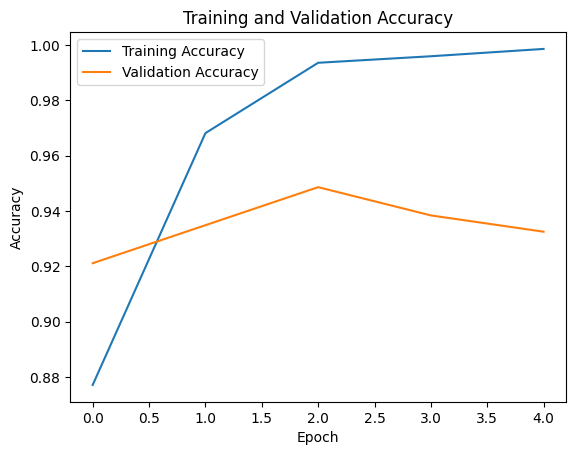

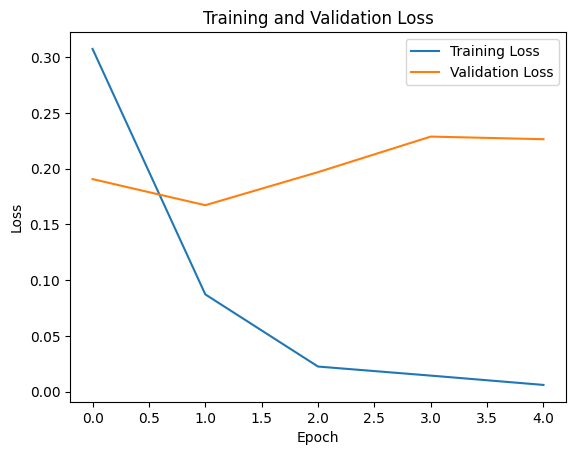

In [ ]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Prediction about election

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming the model has been trained and you have X_test and y_test

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



100/100 [==============================] - 4s 34ms/step
Precision: 0.9595290654893304
Recall: 0.9655683080340615
F1 Score: 0.9625392138770992


100/100 [==============================] - 3s 31ms/step


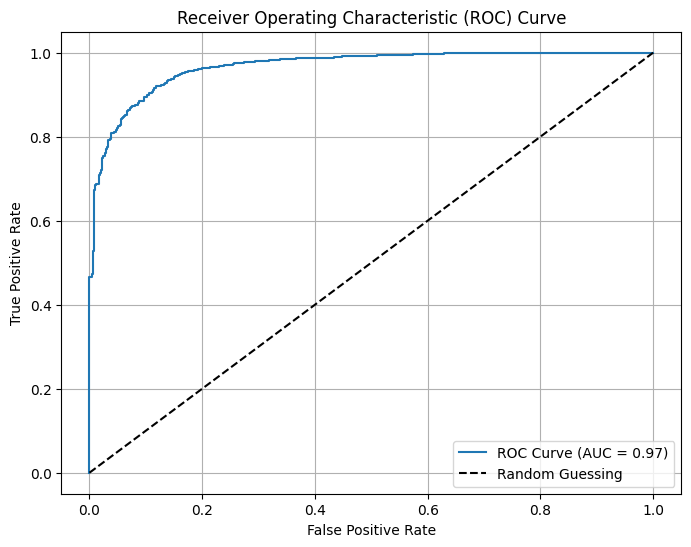

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming the model has been trained and you have X_test and y_test

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(" AUC Score:", auc)

 AUC Score: 0.9663887631924162


In [ ]:
# Calculate the percentage of negative and positive reviews for Modi
modi_count =  modi_data.groupby('sentiment').count()

modi_total_reviews = len(modi_data)
neg_modi = (modi_count['Polarity'][0] / modi_total_reviews) * 100
pos_modi = (modi_count['Polarity'][1] / modi_total_reviews) * 100

# Calculate the percentage of negative and positive reviews for Rahul
rahul_count = rahul_data.groupby('sentiment').count()

rahul_total_reviews = len(rahul_data)
neg_rahul = (rahul_count['Polarity'][0] / rahul_total_reviews) * 100
pos_rahul = (rahul_count['Polarity'][1] / rahul_total_reviews) * 100


# Calculate the percentage of negative and positive reviews for kj
kj_count = kj_data.groupby('sentiment').count()

kj_total_reviews = len(kj_data)
neg_kj = (kj_count['Polarity'][0] / kj_total_reviews) * 100
pos_kj = (kj_count['Polarity'][1] / kj_total_reviews) * 100

In [ ]:
print('Modi')
print('positive tweets % =',pos_modi)
print('negative tweets %= ',neg_modi)
print('\n')
print('rahul')
print('positive tweets % =',pos_rahul)
print('negative tweets %= ',neg_rahul)
print('\n')
print('kj')
print('positive tweets % =',pos_kj)
print('negative tweets %= ',neg_kj)

Modi
positive tweets % = 85.48113740505931
negative tweets %=  14.518862594940682


rahul
positive tweets % = 73.46616972477065
negative tweets %=  26.53383027522936


kj
positive tweets % = 67.24213606437455
negative tweets %=  32.75786393562546


In [ ]:
import plotly.graph_objects as go

politicians = ['Narendra Modi', 'Rahul Gandhi','Arvind Kejriwal']
neg_list = [neg_modi, neg_rahul,neg_kj]
pos_list = [pos_modi, pos_rahul,pos_kj]

fig = go.Figure(
    data=[
        go.Bar(name='Negative', x=politicians, y=neg_list, marker_color='red'),
        go.Bar(name='Positive', x=politicians, y=pos_list, marker_color='green')
    ]
)

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Politician'),
    yaxis=dict(title='Sentiment Count'),
    width=600,  # Adjust the width of the graph
    height=600,  # Adjust the height of the graph
    font=dict(size=14)
)

fig.update_traces(marker=dict(line=dict(width=1)))  # Reduce the width of the bar

fig.show()


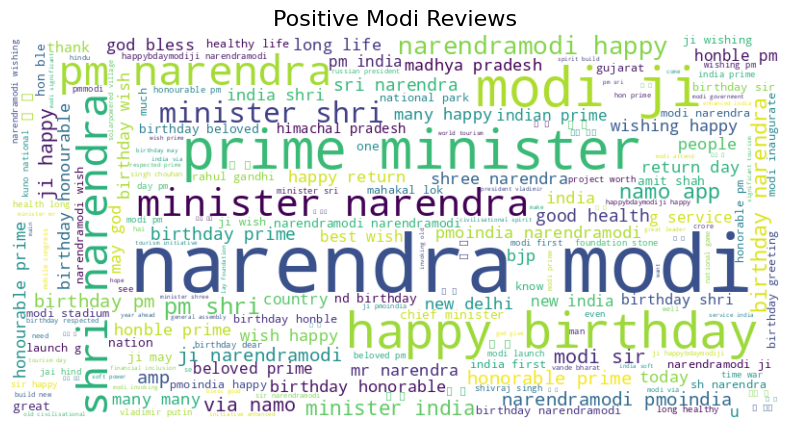

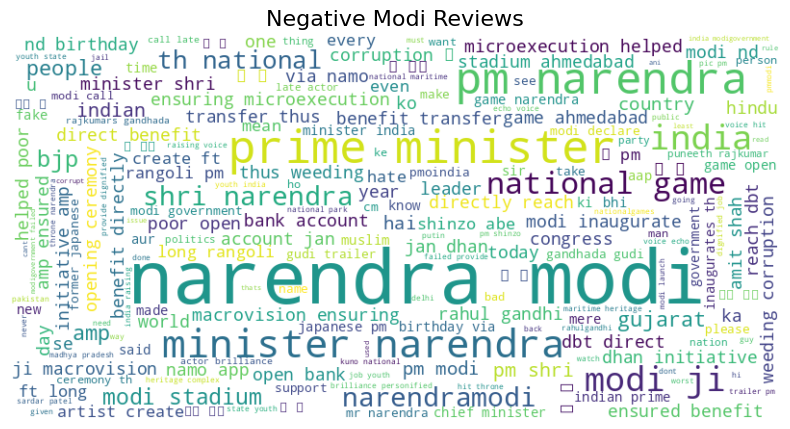

In [ ]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_modi_reviews = modi_data[modi_data['sentiment'] == 'positive']['Tweet']
negative_modi_reviews = modi_data[modi_data['sentiment'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_modi_text = ' '.join(positive_modi_reviews)
negative_modi_text = ' '.join(negative_modi_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_modi_text, 'Positive Modi Reviews')
generate_word_cloud(negative_modi_text, 'Negative Modi Reviews')

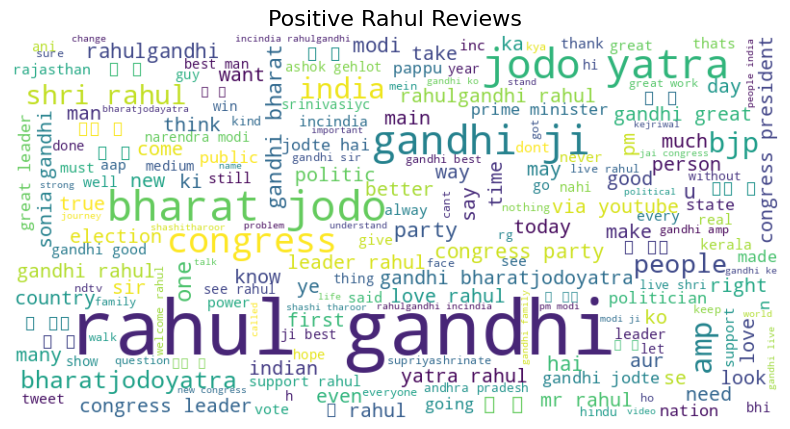

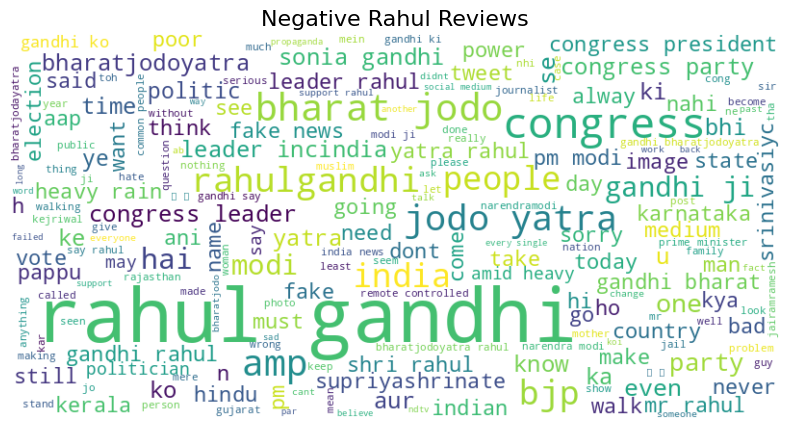

In [ ]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative rahul reviews
positive_rahul_reviews = rahul_data[rahul_data['sentiment'] == 'positive']['Tweet']
negative_rahul_reviews = rahul_data[rahul_data['sentiment'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_rahul_text = ' '.join(positive_rahul_reviews)
negative_rahul_text = ' '.join(negative_rahul_reviews)

# Generate and display word clouds for rahul
generate_word_cloud(positive_rahul_text, 'Positive Rahul Reviews')
generate_word_cloud(negative_rahul_text, 'Negative Rahul Reviews')

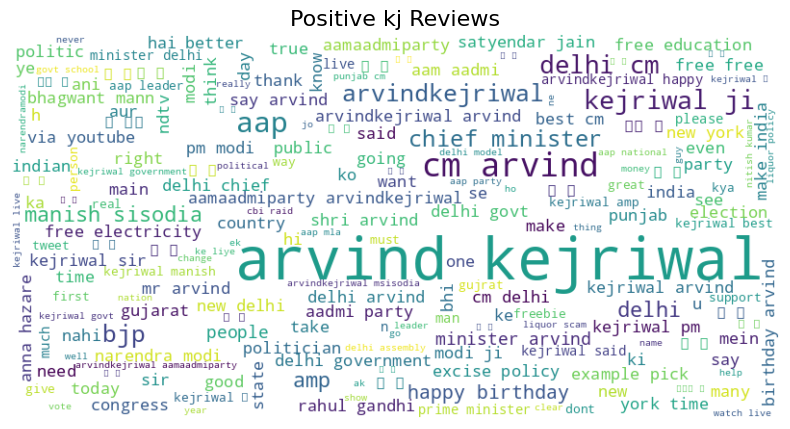

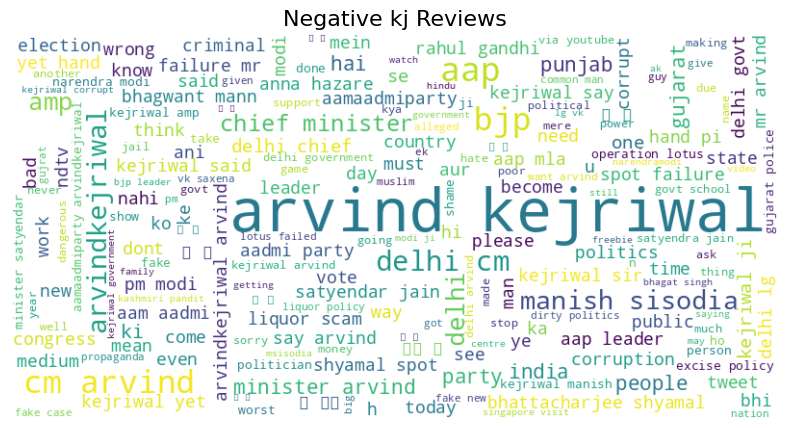

In [ ]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative kj reviews
positive_kj_reviews = kj_data[kj_data['sentiment'] == 'positive']['Tweet']
negative_kj_reviews = kj_data[kj_data['sentiment'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_kj_text = ' '.join(positive_kj_reviews)
negative_kj_text = ' '.join(negative_kj_reviews)

# Generate and display word clouds for kj
generate_word_cloud(positive_kj_text, 'Positive kj Reviews')
generate_word_cloud(negative_kj_text, 'Negative kj Reviews')